In [137]:
# Logistic regression and multi layer perceptron (MLP) from scratch.
# Training using stochastic/batch gradient descent
# Niclas Kjäll-Ohlsson, 2018

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_derivative(z):
    return (1-sigmoid(z))*sigmoid(z)

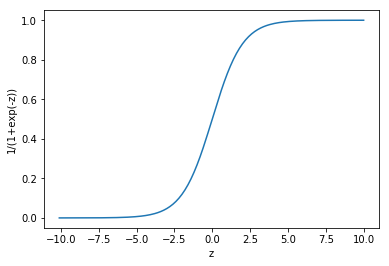

In [3]:
# Plotting the sigmoid function
z = [i/10 for i in range(-101,101)]
g_z = [sigmoid(i) for i in z]
plt.xlabel("z")
plt.ylabel("1/(1+exp(-z))")
plt.plot(z, g_z)
plt.show()

In [4]:
X, y = make_classification()

In [5]:
# Initialise model coefficients. w[0] is bias term
w = np.array([np.random.rand()*2-1 for i in range(X.shape[1]+1)])

preds = sigmoid(w[1:].dot(X.T)-w[0])
print("MSE (before training): " + \
      str(np.sum(np.power(preds-y, 2))/len(y)))
print("Accuracy (before training): " + \
      str(np.sum(y == np.round(preds)/len(y))))

MSE (before training): 0.24550815445589888
Accuracy (before training): 38


In [6]:
# Logistic regression stochastic gradient descent learning
alpha = 0.1

for i in range(500000):
    ind = int(np.random.rand()*X.shape[0])
    pred = sigmoid(w[1:].dot(X[ind,].T)-w[0])
    # Application of chain rule loss'(g(z)) = loss'(g(z))*g'(z)*x_i
    # where g(z) = 1/(1+exp(-z)), and z = w.dot(X.T)-b, and loss = (g(z)-y)^2
    delta = 2*(pred-y[ind])*(1-pred)*pred
    delta_w = delta*X[ind,]
    delta_b = delta
    w[1:] = w[1:] - alpha*delta_w
    w[0] = w[0] - alpha*delta_b
    
# Predict using model
preds = sigmoid(w[1:].dot(X.T)-w[0])
    
print("MSE (after training): " + \
      str(np.sum(np.power(preds-y, 2))/len(y)))
print("Accuracy (after training): " + \
      str(np.sum(y == np.round(preds))/len(y)))

MSE (after training): 0.15002095064968735
Accuracy (after training): 0.85


In [7]:
# Neural network / deep learning non-linear classifier
alpha = 0.01

# Initialise
hidden_layer_nodes = 4
theta_1 = np.array([[np.random.rand()*1.8-0.8 for i in range(X.shape[1]+1)] for j in range(hidden_layer_nodes)])
theta_2 = np.array([np.random.rand()*1.8-0.8 for i in range(hidden_layer_nodes+1)])

layer_1_input = np.hstack((np.repeat(-1, X.shape[0]).reshape(100,1), X))

mse = []
weights = []

# Learning using stochastic gradient descent
for c in range(100000):
    # Choose an observation at random
    ind = int(np.random.rand()*X.shape[0])
    # Forward pass
    # First layer node activations
    layer_1_output = sigmoid(theta_1.dot(layer_1_input[ind].T))
    layer_2_input = np.hstack(([-1], layer_1_output))
    # Neural network output
    layer_2_output = sigmoid(theta_2.dot(layer_2_input))

    # Back propagation
    # Calculate derivative of random observation for neural net output
    layer_2_output_derivative = (layer_2_output-y[ind])*(1-layer_2_output)*layer_2_output
    # Update coefficients of layer 2
    theta_2 -= alpha*layer_2_output_derivative*layer_2_input

    # Calculate hidden layer derivatives
    layer_1_output_derivative = np.sum(theta_1*layer_2_output_derivative,axis=1)*(1-layer_1_output)*layer_1_output
    for node_ind in range(hidden_layer_nodes):
        # Update coefficients of layer 1
        theta_1[node_ind] -= alpha*layer_1_output_derivative[node_ind]*layer_1_input[ind]
        
    if c%100==0:
        preds = sigmoid(np.hstack((np.repeat(-1,X.shape[0]).reshape(X.shape[0],1), sigmoid(layer_1_input.dot(theta_1.T)))).dot(theta_2))
        #print("i " + str(c) + ". MSE: " + str(np.sum(np.power(preds-y, 2))/len(y)) + \
        #     ". Accuracy: " + str(np.sum(y == np.round(preds))/len(y)))
        mse.append((c, np.sum(np.power(preds-y, 2))/len(y)))
        weights.append(\
            np.hstack((np.reshape(theta_1, theta_1.shape[0]*theta_1.shape[1]),\
            np.reshape(theta_2, theta_2.shape[0])))\
        )

weights = np.vstack(weights)
weights_factorised = TruncatedSVD(n_components=2).fit_transform(weights)

In [12]:
preds = sigmoid(np.hstack((np.repeat(-1,X.shape[0]).reshape(X.shape[0],1), sigmoid(layer_1_input.dot(theta_1.T)))).dot(theta_2))
print("MSE: " + str(np.sum(np.power(preds-y, 2))/len(y)))
print("Accuracy: " + str(np.sum(np.round(preds)==y)/len(y)))

MSE: 0.04914266302808896
Accuracy: 0.94


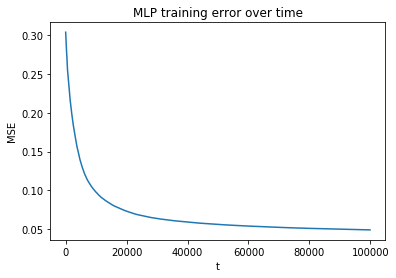

In [13]:
plt.xlabel("t")
plt.ylabel("MSE")
plt.title("MLP training error over time")
plt.plot([i[0] for i in mse], [i[1] for i in mse])
plt.show()

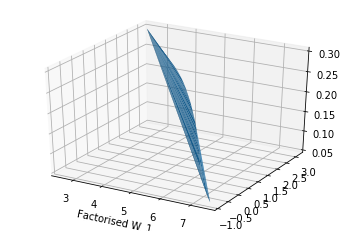

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(weights_factorised[:,0], weights_factorised[:,1], np.array([i[1] for i in mse]))
plt.xlabel("Factorised W_1")
plt.show()

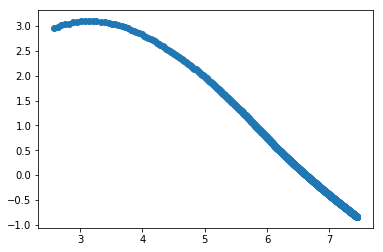

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(weights_factorised[:,0], weights_factorised[:,1])
plt.show()